<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Group10/kaggle/blob/main/Spaceship_Titanic_project_group10_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd



In [2]:
train_data = pd.read_csv ('https://raw.githubusercontent.com/7PAM2015-0105-2023-Group10/kaggle/main/train.csv')
test_data  = pd.read_csv ('https://raw.githubusercontent.com/7PAM2015-0105-2023-Group10/kaggle/main/test.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.shape

(8693, 14)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
# Generate the summary statistics
summary_stats = train_data.describe()

# Convert the summary statistics DataFrame to a formatted table
summary_table = summary_stats.to_latex()

# Save the table to a text file
with open('summary_table.tex', 'w') as f:
    f.write(summary_table)

<ipython-input-7-e662086d1421>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  summary_table = summary_stats.to_latex()


In [8]:
# Save the table to an Excel file
summary_stats.to_excel('summary_table.xlsx')

In [9]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /content


There are outliers in our Data set, in Age min is Zero

In [10]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
#Drop Name column

train_data.drop(columns=['Name'],axis=1,inplace=True)
test_data.drop(columns=['Name'],axis=1,inplace=True)

In [12]:
# Define the columns to update and the condition for the update
columns_to_update = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
condition = lambda df: df["Age"] < 20

# Update train_data
for column in columns_to_update:
    train_data.loc[condition(train_data), column] = train_data.loc[condition(train_data), column].fillna(0)

# Update test_data
for column in columns_to_update:
    test_data.loc[condition(test_data), column] = test_data.loc[condition(test_data), column].fillna(0)


In [13]:
def fill_missing_values(df):
    for column in df.columns:
        # If column is numeric, fill missing values with mean
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].fillna(df[column].mean())
        # Check if column is categorical using isinstance
        elif isinstance(df[column].dtype, pd.CategoricalDtype) or df[column].dtype == 'object':
            # Fill missing values with mode and explicitly cast to avoid downcasting warning
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value).astype(df[column].dtype)

In [14]:
# Apply the function to both train_data and test_data
fill_missing_values(train_data)
fill_missing_values(test_data)

In [15]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [16]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Featuring engineering

1 Extracts the group part from the PassengerId.



In [17]:
def extract_group_number(id):
    """Extracts the group part from the PassengerId."""
    group = id.split('_')[0]
    return group

# Apply the function to both train_data and test_data DataFrames
train_data["GroupNumber"] = train_data["PassengerId"].apply(extract_group_number)
test_data["GroupNumber"] = test_data["PassengerId"].apply(extract_group_number)

In [18]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004


In [19]:
#change data type of GroupNumber to integer on train and test dataset

train_data["GroupNumber"] = train_data["GroupNumber"].astype("int64")
test_data["GroupNumber"] = test_data["GroupNumber"].astype("int64")

In [20]:
def extract_cabin_deck(cabin):
    """Extracts the cabin deck from the Cabin."""
    if pd.notnull(cabin):
        return cabin.split('/')[0]
    return None

In [21]:
train_data["CabinDeck"] = train_data["Cabin"].apply(extract_cabin_deck)
test_data["CabinDeck"] = test_data["Cabin"].apply(extract_cabin_deck)

In [22]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,CabinDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,F


In [23]:
def CabinNum ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[1].split('/')[0]
  else :
    return None

train_data["CabinNum"] = train_data["Cabin"].apply(CabinNum)
test_data["CabinNum"] = test_data["Cabin"].apply(CabinNum)

In [24]:
def CabinSide ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[2]
  else :
    return None

train_data["CabinSide"] = train_data["Cabin"].apply(CabinSide)
test_data["CabinSide"] = test_data["Cabin"].apply(CabinSide)

In [25]:
def AgeGroup (age) :
  if (not pd.isnull(age)) :
    if (age <= 5):
      return "Baby"
    elif (age <= 12):
      return "Child"
    elif age <= 18 :
      return "Teen"
    elif age <= 50 :
      return "Adult"
    else :
      return "Elderly"
  else :
    return "Baby"

train_data ["AgeGroup"] = train_data["Age"].apply(AgeGroup)
test_data ["AgeGroup"] = test_data["Age"].apply(AgeGroup)

In [26]:
train_data["Age"] = train_data["Age"].fillna("Baby")
test_data["Age"] = test_data["Age"].fillna("Baby")

In [27]:
#drop some columns not neccessarily
train_data = train_data.drop(columns=[ "Cabin" ,"PassengerId","Age" ])
test_data  = test_data.drop(columns=["Cabin" , "PassengerId" , "Age"])

In [28]:
train_data['TotalCosts'] = train_data['RoomService']  + train_data['FoodCourt']  + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
test_data['TotalCosts'] = test_data['RoomService']  + test_data['FoodCourt']  + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']

In [29]:
train_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P,Adult,0.0
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,2,F,0,S,Adult,736.0
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,3,A,0,S,Elderly,10383.0
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,3,A,0,S,Adult,5176.0
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,4,F,1,S,Teen,1091.0


In [30]:
train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'GroupNumber', 'CabinDeck', 'CabinNum', 'CabinSide', 'AgeGroup',
       'TotalCosts'],
      dtype='object')

In [31]:
test_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupNumber',
       'CabinDeck', 'CabinNum', 'CabinSide', 'AgeGroup', 'TotalCosts'],
      dtype='object')

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-33-601d2103b205>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


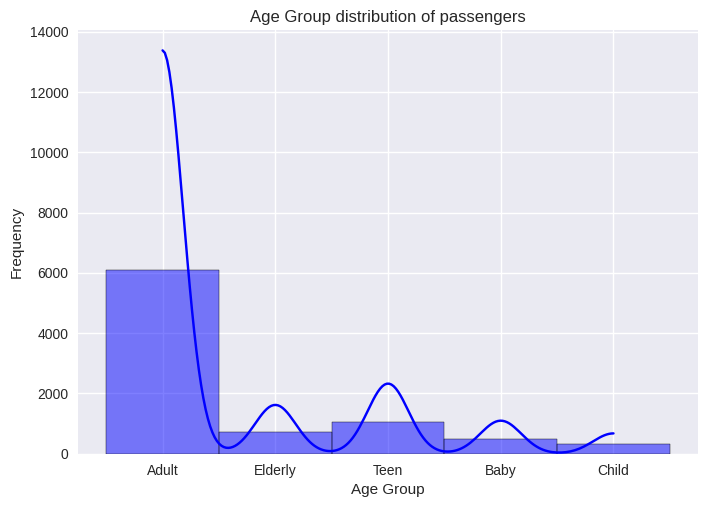

In [33]:
plt.style.use('seaborn')
sns.histplot(train_data['AgeGroup'], bins=20, kde=True, color='blue')
plt.title('Age Group distribution of passengers')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

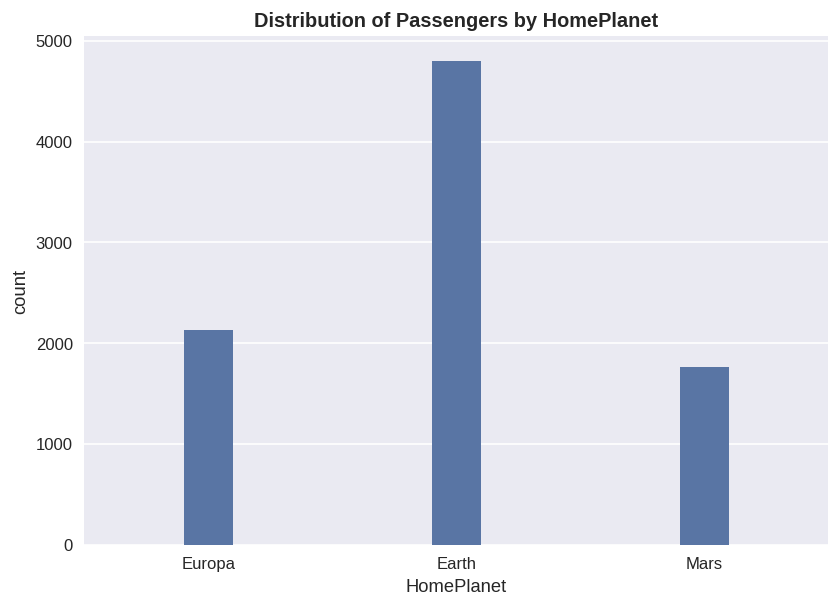

In [34]:
# Example: Distribution of passengers by HomePlanet
plt.figure(dpi=120)
sns.countplot(x='HomePlanet', data=train_data, width=0.2)
plt.title('Distribution of Passengers by HomePlanet', fontweight='bold')
plt.show()


<ipython-input-35-96b5bf88e6b6>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-35-96b5bf88e6b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Destination', data=train_data, order=train_data['Destination'].value_counts().index, palette='bright', width=0.2)


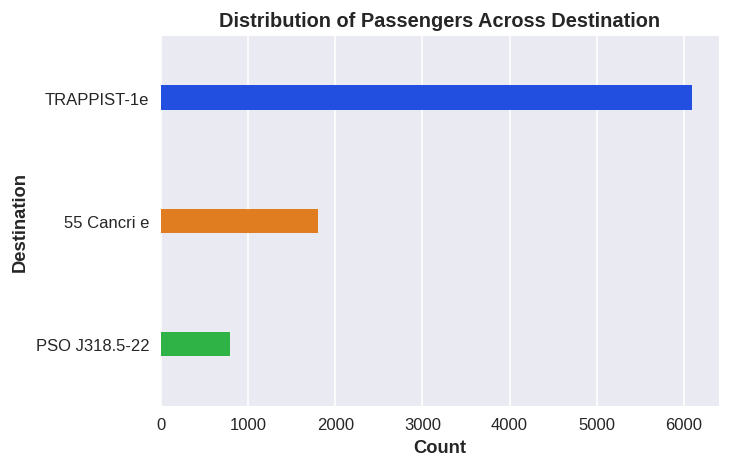

In [35]:
#Destination
plt.style.use('seaborn')
plt.figure(figsize=(6,4), dpi=120)
sns.countplot(y='Destination', data=train_data, order=train_data['Destination'].value_counts().index, palette='bright', width=0.2)
plt.title('Distribution of Passengers Across Destination', fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Destination', fontweight='bold')
plt.show()

<ipython-input-36-e3578e9cb676>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Destination', data=train_data, order=train_data['Destination'].value_counts().index, palette='coolwarm', width=0.2)


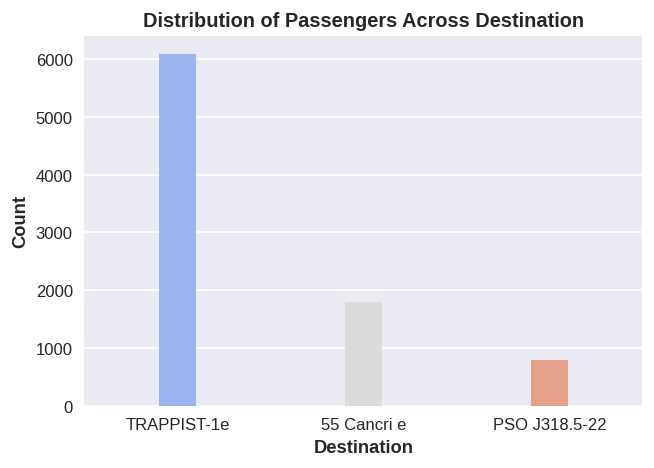

In [36]:
plt.figure(figsize=(6, 4), dpi=120)
sns.countplot(x='Destination', data=train_data, order=train_data['Destination'].value_counts().index, palette='coolwarm', width=0.2)
plt.title('Distribution of Passengers Across Destination', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Destination', fontweight='bold')
plt.xticks()
plt.show()

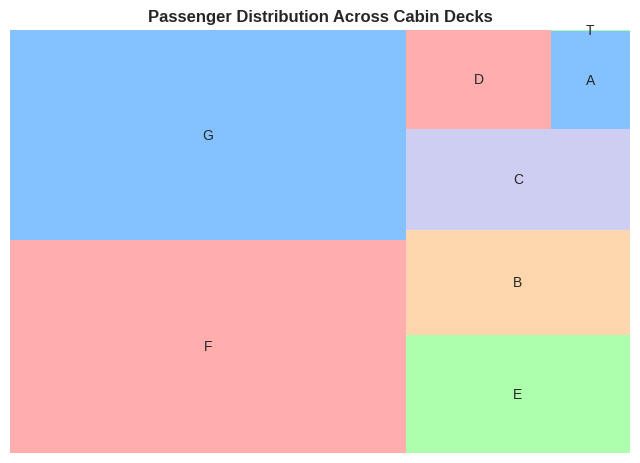

In [39]:
import squarify

# Define custom colors for the squares
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# You need to calculate the sizes (e.g., count of passengers in each CabinDeck)
sizes = train_data['CabinDeck'].value_counts()
label = sizes.index
squarify.plot(sizes=sizes, label=label, alpha=0.8, linewidth=25, color=colors)
plt.title('Passenger Distribution Across Cabin Decks', fontweight='bold')
plt.axis('off')
plt.show()


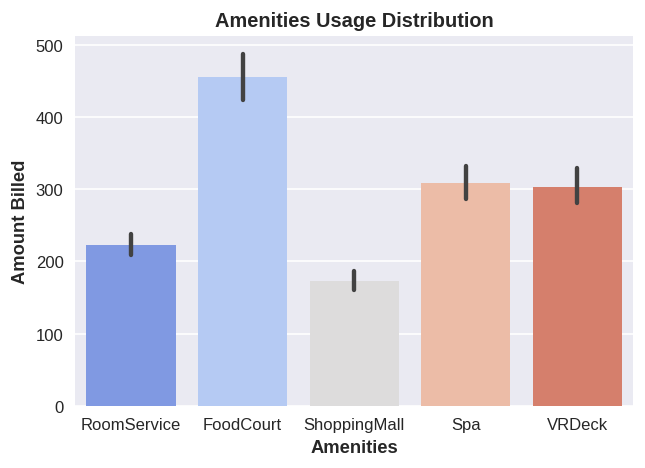

In [40]:
#Amenities usage distribution
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(6,4), dpi=120)
sns.barplot(data=train_data[amenities], palette='coolwarm')
plt.title('Amenities Usage Distribution', fontweight='bold')
plt.ylabel('Amount Billed', fontweight='bold')
plt.xlabel('Amenities', fontweight='bold')
plt.show()

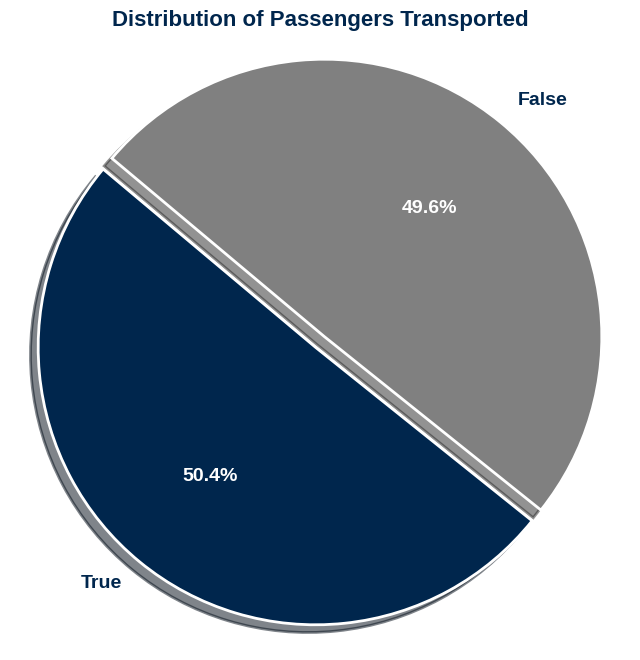

In [41]:
import matplotlib.pyplot as plt

# Count the number of passengers transported
transported_counts = train_data['Transported'].value_counts()

# Define custom colors (very dark blue and grey)
colors = ['#00264d', '#808080']

# Explode the transported slice for emphasis
explode = (0.05, 0)

# Plot the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(transported_counts,
                                     labels=transported_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     explode=explode,
                                     startangle=140,
                                     shadow=True,
                                     textprops={'fontsize': 14, 'fontweight': 'bold', 'color': '#00264d'},
                                     wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Set text color to white for percentage text
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribution of Passengers Transported', fontweight='bold', fontsize=16, color='#00264d')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


In [42]:
train_data['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

The class distribution in your Transported column with 4378 instances of True and 4315 of False is not considered imbalanced. An imbalanced class typically refers to a situation where the number of instances of one class is significantly smaller than the other classes within the dataset.

In the context of binary classification, where there are only two classes, imbalance would generally be something that is quite skewed, like having 90% of the data in one class and 10% in the other. In your case, the classes are almost equally represented, so this would not be considered an imbalance.

<ipython-input-43-337819e26e04>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True);


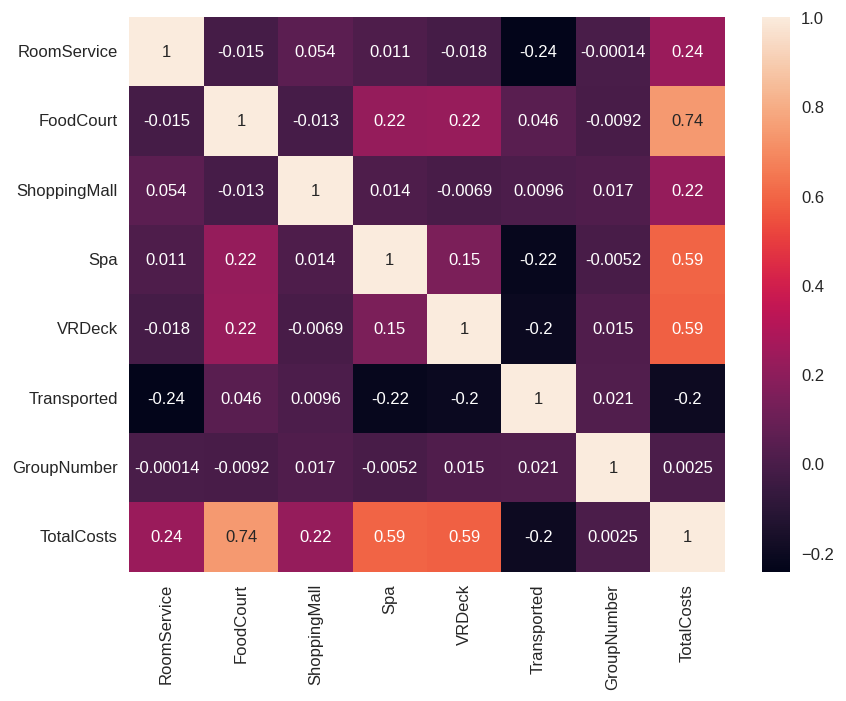

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=120)
sns.heatmap(train_data.corr(), annot=True);

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_data['HomePlanet']= label_encoder.fit_transform(train_data['HomePlanet'])
train_data['Destination']= label_encoder.fit_transform(train_data['Destination'])
train_data['CryoSleep']= label_encoder.fit_transform(train_data['CryoSleep'])
train_data['Transported']= label_encoder.fit_transform(train_data['Transported'])
train_data['VIP']= label_encoder.fit_transform(train_data['VIP'])
train_data['CabinDeck']= label_encoder.fit_transform(train_data['CabinDeck'])
train_data['AgeGroup']= label_encoder.fit_transform(train_data['AgeGroup'])
train_data['CabinSide']= label_encoder.fit_transform(train_data['CabinSide'])

In [45]:
# Encode labels in column in test data
test_data['HomePlanet']= label_encoder.fit_transform(test_data['HomePlanet'])
test_data['Destination']= label_encoder.fit_transform(test_data['Destination'])
test_data['CryoSleep']= label_encoder.fit_transform(test_data['CryoSleep'])
test_data['VIP']= label_encoder.fit_transform(test_data['VIP'])
test_data['CabinDeck']= label_encoder.fit_transform(test_data['CabinDeck'])
test_data['AgeGroup']= label_encoder.fit_transform(test_data['AgeGroup'])
test_data['CabinSide']= label_encoder.fit_transform(test_data['CabinSide'])

In [46]:
train_data.head()


,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0.0
1,0,0,2,0,109.0,9.0,25.0,549.0,44.0,1,2,5,0,1,0,736.0
2,1,0,2,1,43.0,3576.0,0.0,6715.0,49.0,0,3,0,0,1,3,10383.0
3,1,0,2,0,0.0,1283.0,371.0,3329.0,193.0,0,3,0,0,1,0,5176.0
4,0,0,2,0,303.0,70.0,151.0,565.0,2.0,1,4,5,1,1,4,1091.0


In [47]:
#split X and Y
X = train_data.drop("Transported", axis=1)
y = train_data["Transported"]


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((6954, 15), (1739, 15), (6954,), (1739,))

ML Models

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [51]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0)
LogisticRegressionModel.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [52]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7699827487061529


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

models_and_params = {
    LogisticRegression: {
        'penalty': ['l2'],
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200]
    },
    RandomForestClassifier: {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    GradientBoostingClassifier: {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 10]
    },
    DecisionTreeClassifier: {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
}


In [54]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix

results = []
for model, params in models_and_params.items():
    clf = GridSearchCV(model(), params, cv=5, scoring='accuracy')
    clf.fit(x_train, y_train)

    best_model = clf.best_estimator_
    preds = best_model.predict(x_test)

    print(f"Best params for {model.__name__}: {clf.best_params_}")
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    print(f"Confusion Matrix for {model.__name__}:\n{cm}\n")

    # Store results
    results.append({
        'Model': model.__name__,
        'Best Params': clf.best_params_,
        'Accuracy': clf.best_score_,
        'Confusion Matrix': cm,
        'Classification Report': classification_report(y_test, preds, output_dict=True)
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best params for LogisticRegression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       861
           1       0.75      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix for LogisticRegression:
[[626 235]
 [170 708]]

Best params for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       861
           1       0.79      0.79      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix for RandomForestClassifier:
[[680 181]
 [188 690]]

Bes

In [55]:
GBCModel = GradientBoostingClassifier ( n_estimators = 150  , learning_rate=0.03 , max_depth = 5 )
GBCModel.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=5, n_estimators=150)

In [56]:
gbc =  GBCModel.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
class_report = classification_report(y_test, gbc)

print("The Classfication Report for Gradient Boosting \n" , class_report)

The Classfication Report for Gradient Boosting 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       861
           1       0.78      0.83      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



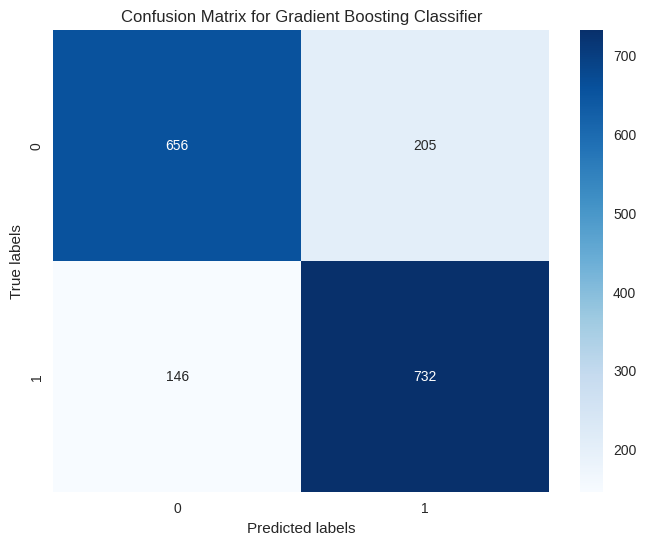

In [58]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, gbc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [59]:
myPredictions =  GBCModel.predict(test_data)

In [60]:
myPredictions = myPredictions.astype(bool)
myPredictions

array([ True, False,  True, ...,  True,  True,  True])

In [63]:
sub = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0105-2023-Group10/kaggle/main/sample_submission.csv")

In [64]:
# Create a new DataFrame with ID and Predicted Rentals
new_df = pd.DataFrame({
    'PassengerId': sub['PassengerId'],
    'Transported': myPredictions
})

In [65]:
#submission
new_df.to_csv('submissionofgbm.csv', index=False)

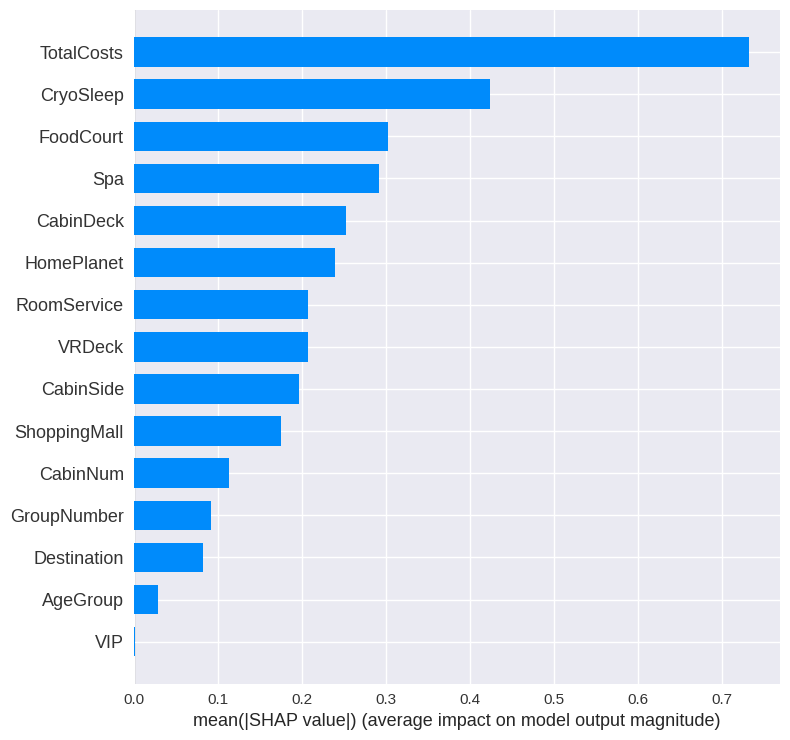

In [157]:
#using shap AI for explainable AI for Gradient Boosting Classifier
import shap

explainer = shap.TreeExplainer(GBCModel)
shap_values = explainer.shap_values(x_train)

# For summary plot
shap.summary_plot(shap_values, x_train, plot_type="bar")